In [1]:
import keras 
from keras.models import Sequential
import numpy as np
np.random.seed(1337)
import matplotlib.pyplot as plt
from keras.layers import Dense

#create some data
X = np.linspace(-1, 1, 200) #numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

                            #在指定的间隔内返回均匀间隔的数字。

                            #返回num均匀分布的样本，在[start, stop]。

                            #这个区间的端点可以任意的被排除在外。
np.random.shuffle(X)#randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200,))
# plot the data
plt.scatter(X, Y)
plt.show()



Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

In [2]:
X_train, Y_train = X[:160], Y[:160] #train 前160 data points
X_test, Y_test = X[160:], Y[160:] #test the latter 40 data points


In [3]:
model = Sequential()
model.add(Dense(output_dim = 1, input_dim = 1))
# choose loss function and optimizing method
model.compile(loss = 'mse', optimizer = 'sgd') 


#training
print("Training-------------")
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if (step % 100 == 0):
        print("train cost:", cost)


/Users/marenwen/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


Training-------------
train cost: 4.0225005
train cost: 0.073238626
train cost: 0.00386274
train cost: 0.002643449


In [4]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)



Testing ------------
40/40 [==============================] - 0s 374us/step
test cost: 0.0031367032788693905
Weights= [[0.4922711]] 
biases= [1.9995022]


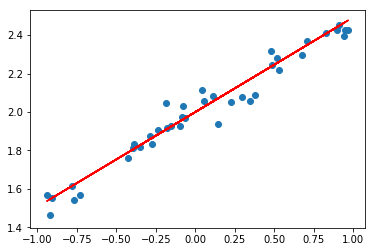

In [8]:
#plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, 'r')
plt.show()